# **Neural Network to classify Iris Flowers**

## **Importing Libraries**

In [33]:
import tensorflow as tf
from keras.layers import *
from keras.models import *
from keras.optimizers import *
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

## **Data Collection**

In [2]:
# Reading csv file using pandas library
dataset  = pd.read_csv('IRIS.csv')

# Getting a preview of the data
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Getting the number of classes
num_classes = dataset['species'].nunique()

# Checking if there's any null values or missing data
dataset.isnull().any() 
#dataset.isna().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

## **Data Description**

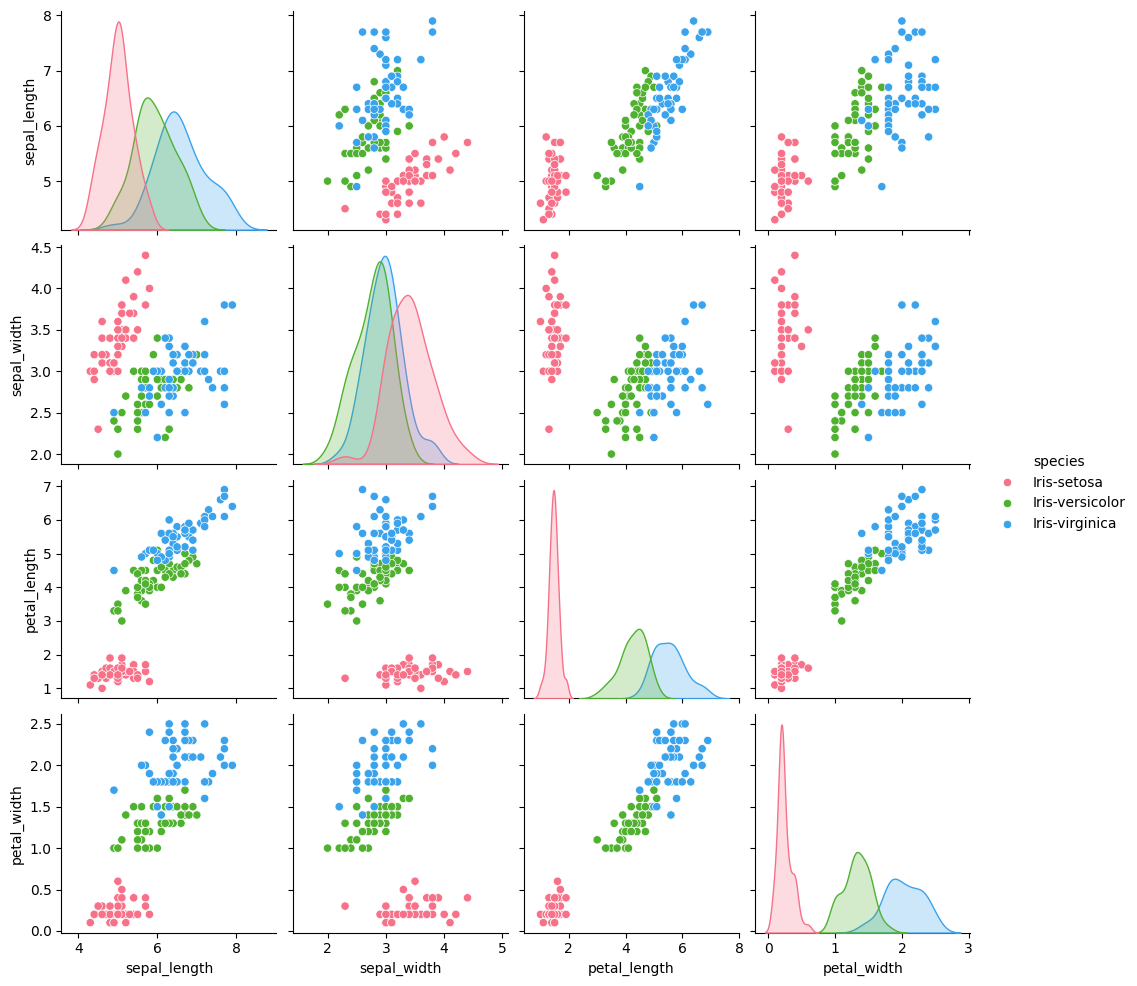

In [4]:
# Pair Plot
sns.pairplot(dataset, hue = "species", palette='husl' )

## **Data Preparation & Preprocessing**

In [6]:
# Converting categorical data into numerical values for classification
dataset['species'] = LabelEncoder().fit_transform(dataset['species'])

In [7]:
# Splitting data into inputs and labels

inputs = dataset[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
true_labels = dataset['species']
#print(true_labels)

In [8]:
# Splitting dataset into train/test data with a split percentage of 20%
train_data, test_data, train_labels, test_labels = train_test_split(inputs, true_labels,test_size=0.2)
#print(train_labels.shape)
#print(test_labels.shape)

## **Neural Network Architecture**

In [19]:
# Neural Network Architecture
model = Sequential([Dense(32, activation = 'relu', input_shape=(4,)),
                   Dense(64, activation='relu'),
                   Dense(3, activation='softmax')])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                160       
                                                                 
 dense_7 (Dense)             (None, 64)                2112      
                                                                 
 dense_8 (Dense)             (None, 3)                 195       
                                                                 
Total params: 2467 (9.64 KB)
Trainable params: 2467 (9.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
opt = Adam(learning_rate=0.002)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## **Model Training**

In [25]:
hist = model.fit(train_data, train_labels, epochs=5, batch_size=25, validation_data = (test_data, test_labels))

Epoch 1/5
5/5 [==============================] - 0s 19ms/step - loss: 0.7288 - accuracy: 0.7083 - val_loss: 0.6909 - val_accuracy: 0.6667
Epoch 2/5
5/5 [==============================] - 0s 5ms/step - loss: 0.6165 - accuracy: 0.8667 - val_loss: 0.5964 - val_accuracy: 1.0000
Epoch 3/5
5/5 [==============================] - 0s 5ms/step - loss: 0.5381 - accuracy: 0.9583 - val_loss: 0.5310 - val_accuracy: 1.0000
Epoch 4/5
5/5 [==============================] - 0s 5ms/step - loss: 0.4746 - accuracy: 0.9083 - val_loss: 0.4841 - val_accuracy: 0.9667
Epoch 5/5
5/5 [==============================] - 0s 4ms/step - loss: 0.4270 - accuracy: 0.9667 - val_loss: 0.4373 - val_accuracy: 1.0000


## **Results**

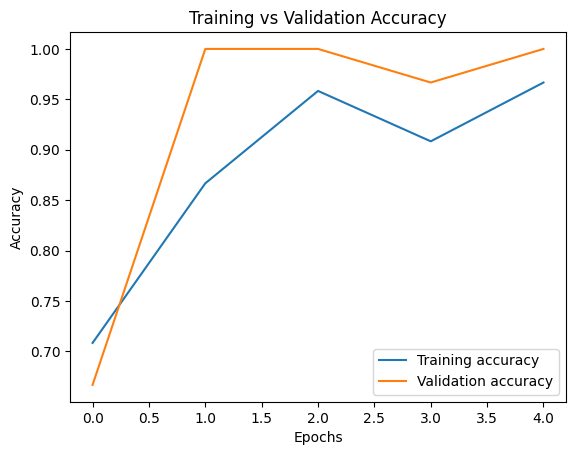

In [26]:
# Accuracy Plots
train_accuracy = hist.history['accuracy']
test_accuracy = hist.history['val_accuracy']
plt.plot(train_accuracy, label='Training accuracy')
plt.plot(test_accuracy, label='Validation accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

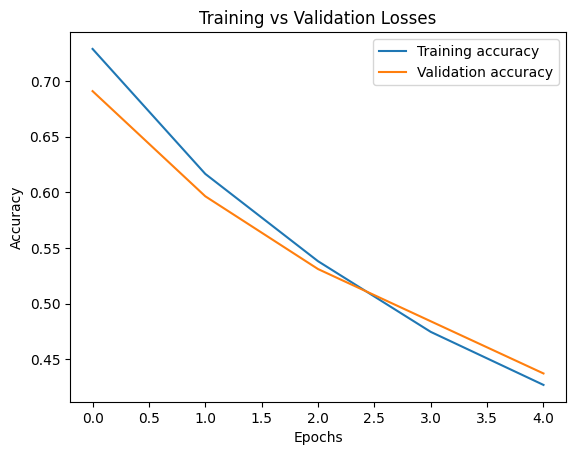

In [27]:
# Loss Plots
train_loss = hist.history['loss']
test_loss = hist.history['val_loss']
plt.plot(train_loss, label='Training accuracy')
plt.plot(test_loss, label='Validation accuracy')
plt.title('Training vs Validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## **Evaluation Metrics**

In [31]:
# Classification Report
print(classification_report(test_labels, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



1/1 [==============================] - 0s 33ms/step


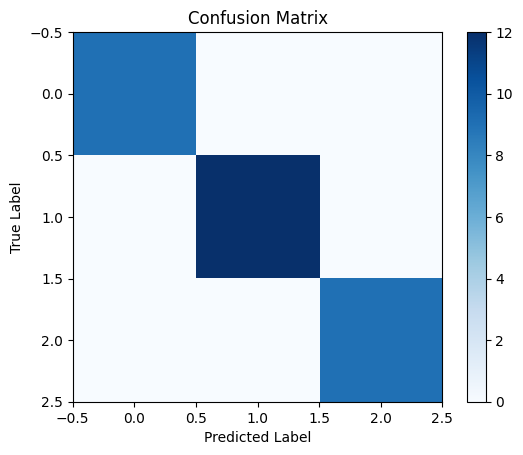

In [32]:
# Confusion Matrix
probs = model.predict(test_data)
predictions = np.argmax(probs, axis=1)
conf_matrix = confusion_matrix(test_labels, predictions)

plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()